In [387]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
pic_path="C:\mypython\plots"
path='C:/mypython/datasets/'
file=path+"SYB62_200_201905_Employment.csv"
data=pd.read_csv(file)
data.head()

,index,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male a...,35.24,Estimate.,"International Labour Organization (ILO), Genev..."
1,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male and ...,22.62,Estimate.,"International Labour Organization (ILO), Genev..."
2,1,"Total, all countries or areas",2005,Employment by industry: Services (%) Male and ...,42.14,Estimate.,"International Labour Organization (ILO), Genev..."
3,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male,34.04,Estimate.,"International Labour Organization (ILO), Genev..."
4,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male,25.46,Estimate.,"International Labour Organization (ILO), Genev..."


In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                8061 non-null   int64  
 1   Region/Country/Area  8061 non-null   object 
 2   Year                 8061 non-null   int64  
 3   Series               8061 non-null   object 
 4   Value                8061 non-null   float64
 5   Footnotes            8019 non-null   object 
 6   Source               8061 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 441.0+ KB


In [390]:
data.rename(columns={"Region/Country/Area":"Area"},inplace=True)   # 重命名
data.rename(columns=dict( (k,k.lower()) for k in  data.columns ),inplace=True)  # 列名全部小写
def industry(x):
    """正则匹配series字段 字符串的产业类型"""
    if re.findall("Employment by industry:(.*?)\(",x):
        return re.findall("Employment by industry:(.*?)\(",x)[0].strip()
def gender(x):
    """正则匹配series字段 字符串中各产业从业人员性别"""
    if " Male and Female" in x:
        return "both"
    elif "Male" in x:
        return "Male"
    elif "Female" in x:
        return "Female"
    else:
        return "Error"
data['economy']=data['series'].apply(industry)
data['gender']=data['series'].apply(gender)

In [391]:
data.head()

,index,area,year,series,value,footnotes,source,economy,gender
0,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male a...,35.24,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,both
1,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male and ...,22.62,Estimate.,"International Labour Organization (ILO), Genev...",Industry,both
2,1,"Total, all countries or areas",2005,Employment by industry: Services (%) Male and ...,42.14,Estimate.,"International Labour Organization (ILO), Genev...",Services,both
3,1,"Total, all countries or areas",2005,Employment by industry: Agriculture (%) Male,34.04,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,Male
4,1,"Total, all countries or areas",2005,Employment by industry: Industry (%) Male,25.46,Estimate.,"International Labour Organization (ILO), Genev...",Industry,Male


In [401]:
years=[2005,2010,2015,2019]
area=["Thailand","Malaysia","Viet Nam"]
df=data[(data['gender']=='both')&(data['area'].isin(area))]
print(df['year'].unique())
df=df[df['year'].isin(years)]
df.sort_values(by=['area','year'])
economy_sort=['Agriculture' ,'Industry', 'Services']
df['economy']=df['economy'].astype('category').cat.set_categories(economy_sort)
df=df.sort_values(by=['area','year','economy'],ascending=[1,1,0])
data.sort_values(['area','year','gender'])

[2005 2010 2015 2019]


,index,area,year,series,value,footnotes,source,economy,gender
906,4,Afghanistan,2005,Employment by industry: Agriculture (%) Female,81.41,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,Female
907,4,Afghanistan,2005,Employment by industry: Industry (%) Female,6.76,Estimate.,"International Labour Organization (ILO), Genev...",Industry,Female
908,4,Afghanistan,2005,Employment by industry: Services (%) Female,11.83,Estimate.,"International Labour Organization (ILO), Genev...",Services,Female
903,4,Afghanistan,2005,Employment by industry: Agriculture (%) Male,70.22,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,Male
904,4,Afghanistan,2005,Employment by industry: Industry (%) Male,6.54,Estimate.,"International Labour Organization (ILO), Genev...",Industry,Male
...,...,...,...,...,...,...,...,...,...
8020,716,Zimbabwe,2019,Employment by industry: Industry (%) Male,12.29,Estimate.,"International Labour Organization (ILO), Genev...",Industry,Male
8021,716,Zimbabwe,2019,Employment by industry: Services (%) Male,23.43,Estimate.,"International Labour Organization (ILO), Genev...",Services,Male
8016,716,Zimbabwe,2019,Employment by industry: Agriculture (%) Male a...,68.68,Estimate.,"International Labour Organization (ILO), Genev...",Agriculture,both
8017,716,Zimbabwe,2019,Employment by industry: Industry (%) Male and ...,7.34,Estimate.,"International Labour Organization (ILO), Genev...",Industry,both


In [410]:
s=reversed(labels)
s

In [414]:
plt.rcParams['font.serif']=

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

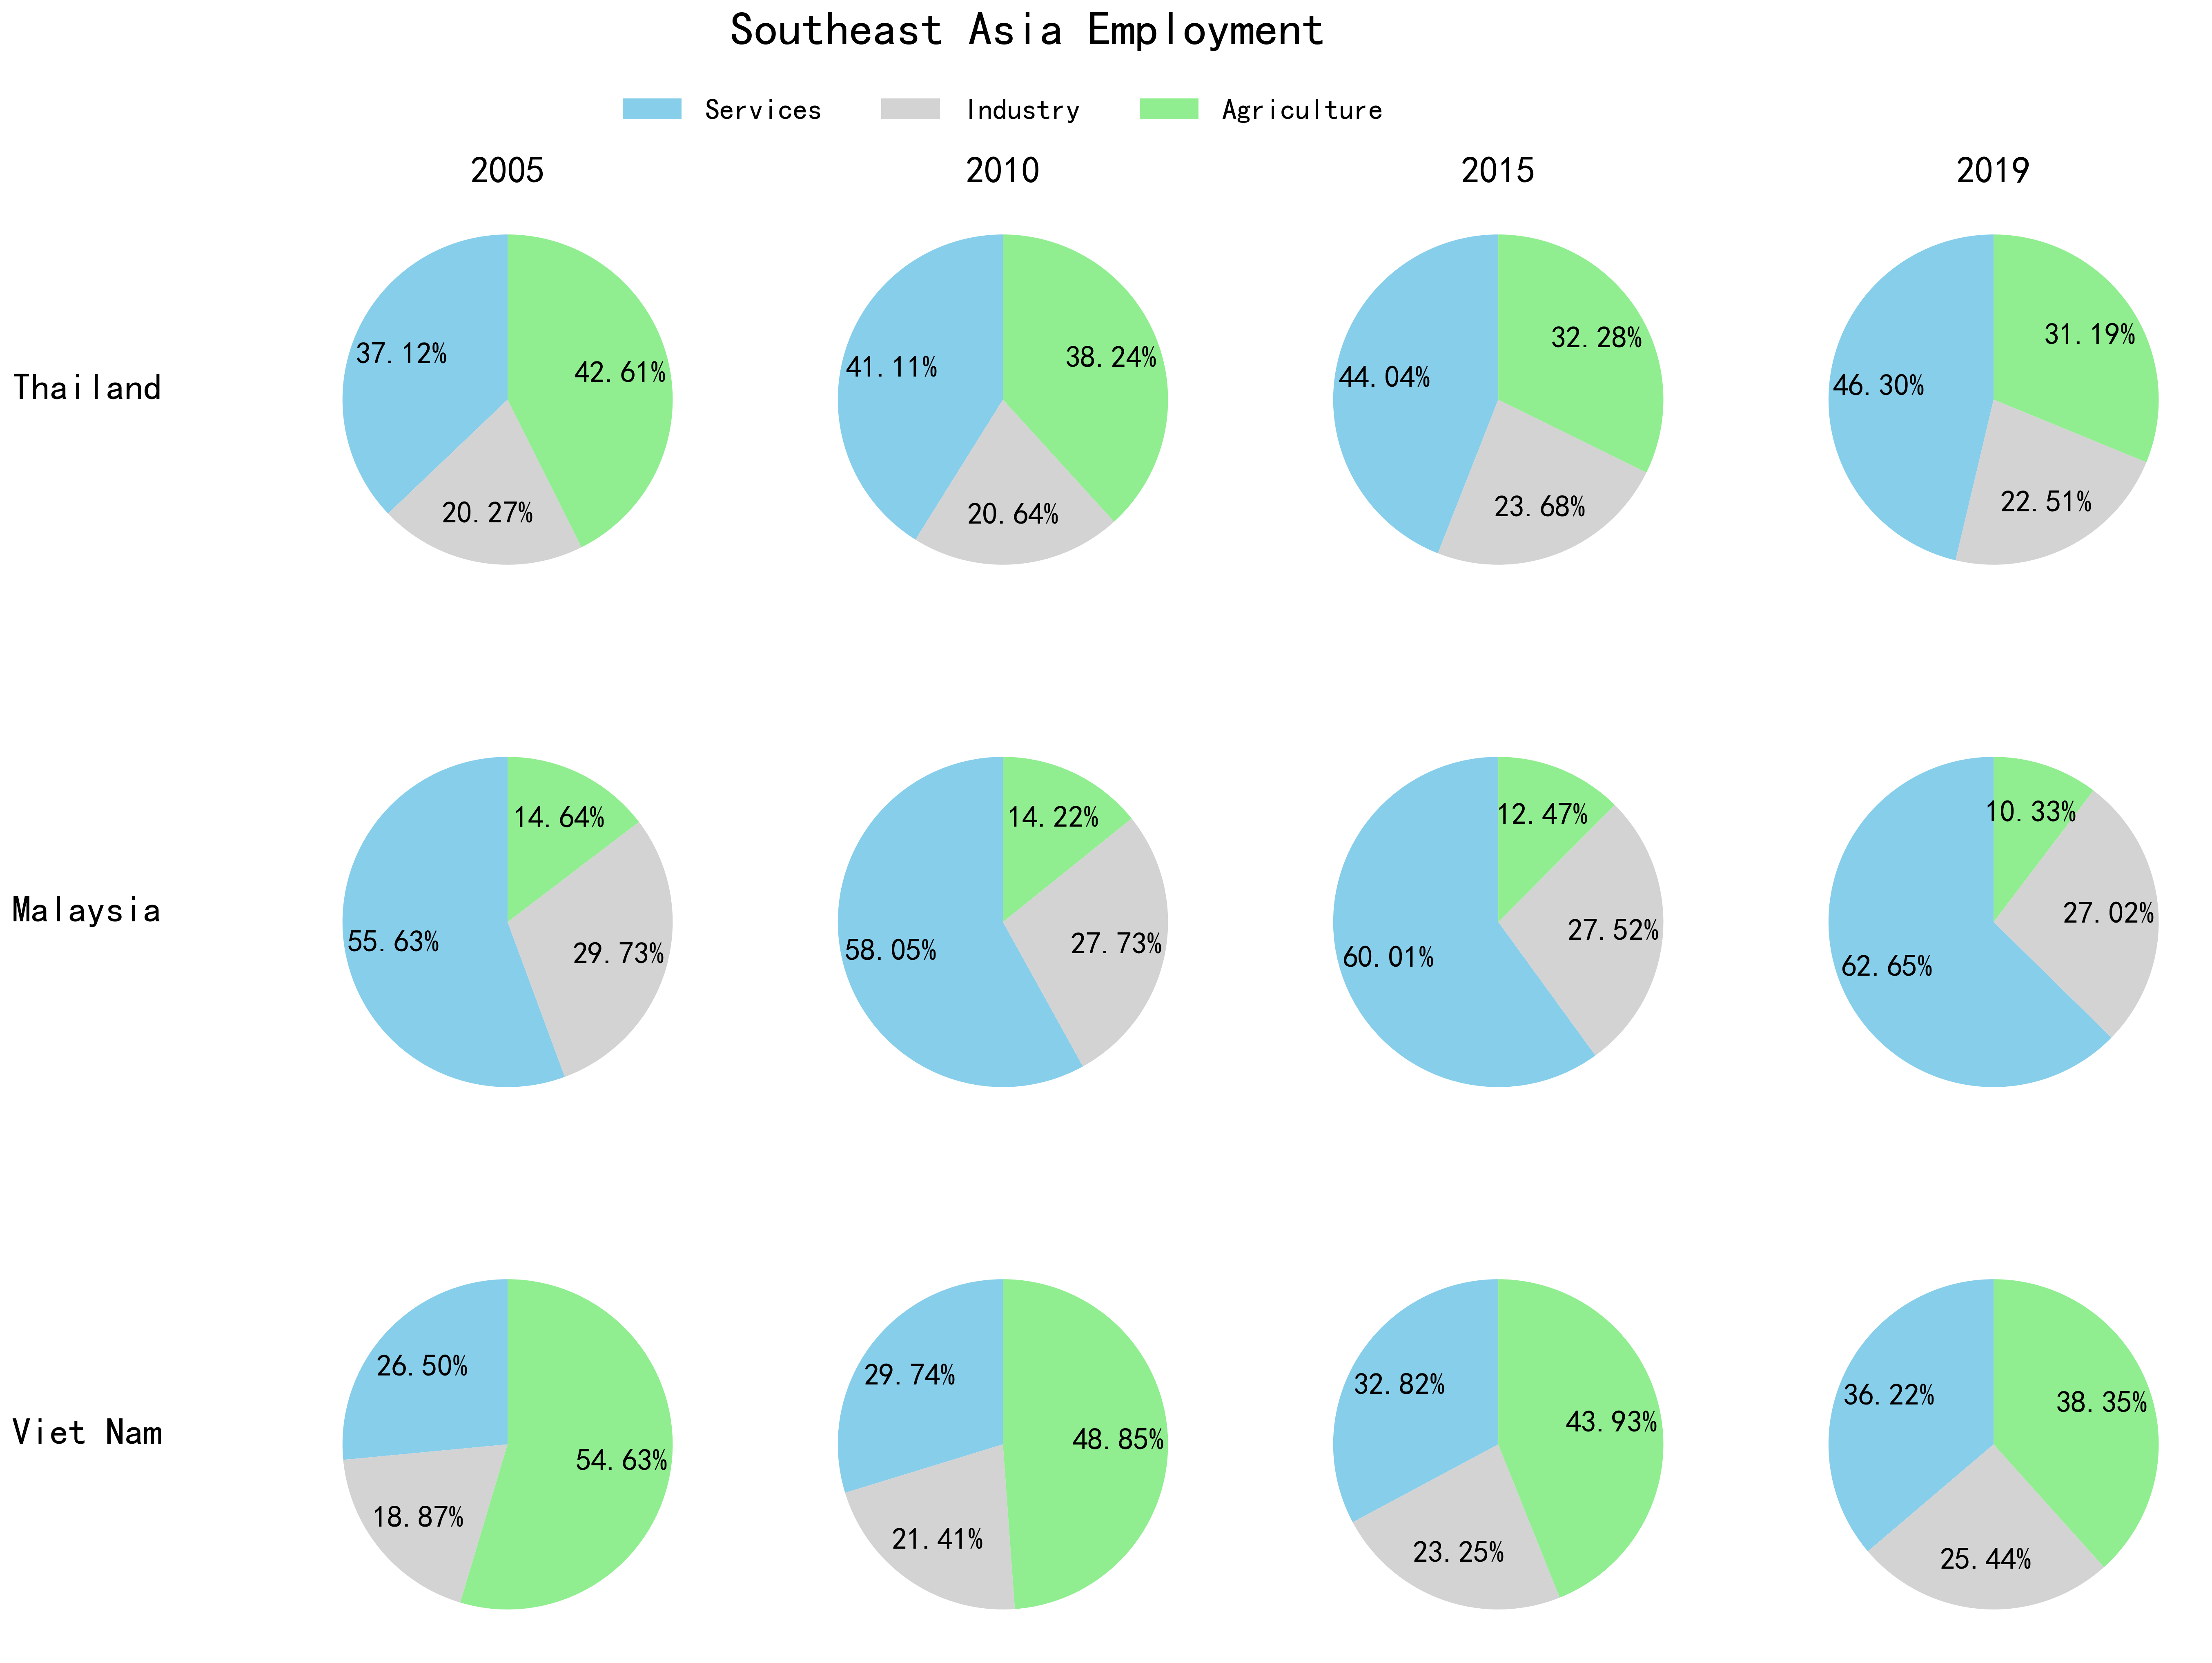

In [417]:
fig,axes=plt.subplots(3,4,figsize=(20,16),dpi=300)
axes=axes.flatten()                           #一维
colors=["skyblue","lightgray","lightgreen"]
for p,a in enumerate(area): 
    dat=df[df['area']==a]                    # 筛选国家
    for q,y in enumerate(years):
        labels=dat[dat['year']==y]['economy']  #饼图各部分标签
        values=dat[dat['year']==y]['value']   #饼图各部分比例值
        idx=p*4+q                             #饼图位置
        axes[idx].pie(values,startangle=90,autopct="%.2f%%",textprops={'fontsize':18},colors=colors,pctdistance=0.7)
        if idx <4:
            axes[idx].set_title(str(y),fontdict={'fontsize':"22"})     #第一行每个图上面标上时间
        if idx%4==0:
            axes[idx].text(x=-3,y=0,s=a,fontdict={"fontsize":"22"})    #第一列每个图左边标上国家

# xlim=fig.gca().axes.get_xlim()
# ylim=fig.gca().axes.get_ylim()
axes[2].legend(labels=labels,loc='center', bbox_to_anchor=(-0.7,1.2),ncol=3,fontsize='xx-large',edgecolor='w',fancybox=False,shadow=False)
fig.text(x=0.3,y=0.95,s="Southeast Asia Employment",fontdict={"fontsize":"28"})  #大标题
plt.savefig(pic_path+"\Southeast_Asia_Employmen.png")

In [395]:
fig.gca().axes.get_xlim()
fig.gca().axes.get_ylim()

(-1.25, 1.25)

([<matplotlib.patches.Wedge at 0x1b092edd208>,
 [Text(-0.8600146582346295, 0.6858387475358718, 'a'),
  Text(-0.8600145619153347, -0.68583886831644, 'b'),
  Text(1.0724207525084946, -0.24477281219349972, 'c')])

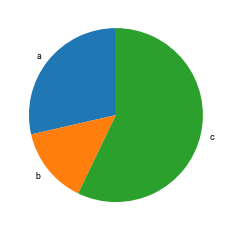

In [396]:
labels=['a','b','c']
vals=[4,2,8]
plt.figure()
plt.pie(vals,labels=labels,startangle=90)